# tmp — may24

**Motivation**: scratch notebook <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 0
device = f'cuda:{device_idx}'

model_type = 'poisson'

In [3]:
host = os.uname().nodename
print(f"host: {host}")

host: chewie

In [4]:
cfg_vae, cfg_tr = default_configs('MNIST', model_type, 'conv+b|conv+b')
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

In [5]:
tr.train()

  0%|                                                                                                | 0/1200 [00:00<?, ?it/s]/home/hadi/Dropbox/git/_PoissonVAE/base/common.py:353: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/conda-bld/pytorch_1712608853085/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(
/home/hadi/anaconda3/lib/python3.11/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/conda-bld/pytorch_1712608853085/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
epoch # 63, avg loss: 54.959095:   5%|██▋                

KeyboardInterrupt: 

## ST models working?

In [4]:
models2load = {
    'categorical-st': dict(
        model_name='categorical-512_DOVES_z-1_<lin|lin>',
        fit_name='st_mc_b1000-ep3000-lr(0.005)_beta(1:0x0.5)_temp(0.1:lin-0.5)_gr(500)_(2024_05_10,14:13)',
    ),
    'poisson-st': dict(
        model_name='poisson_uniform_c(-4)_DOVES_z-512_fp_<lin|lin>',
        fit_name='st_mc_b1000-ep3000-lr(0.005)_beta(1:0x0.5)_temp(0.05:lin-0.5)_gr(500)_(2024_05_10,13:56)',
    ),
    'poisson-mc': dict(
        model_name='poisson_uniform_c(-4)_DOVES_z-512_fp_<lin|lin>',
        fit_name='mc_mc_b1000-ep3000-lr(0.005)_beta(1:0x0.5)_temp(0.05:lin-0.5)_gr(500)_(2024_05_10,14:43)',
    ),
}

In [5]:
kws = dict(
    path='/home/dekel/Projects/PoissonVAE/models',
    device=device,
    verbose=True,
)
trainers = {}
for name, load_dict in models2load.items():
    trainers[name] = load_model(**load_dict, **kws)[0]

# params: 262.7 K

# params: 262.7 K

# params: 262.7 K

categorical-st:
{'mse': 167.9786, 'kl': 6.2342987, 'kl_diag': 6.2342496, 'tot': 174.2129}

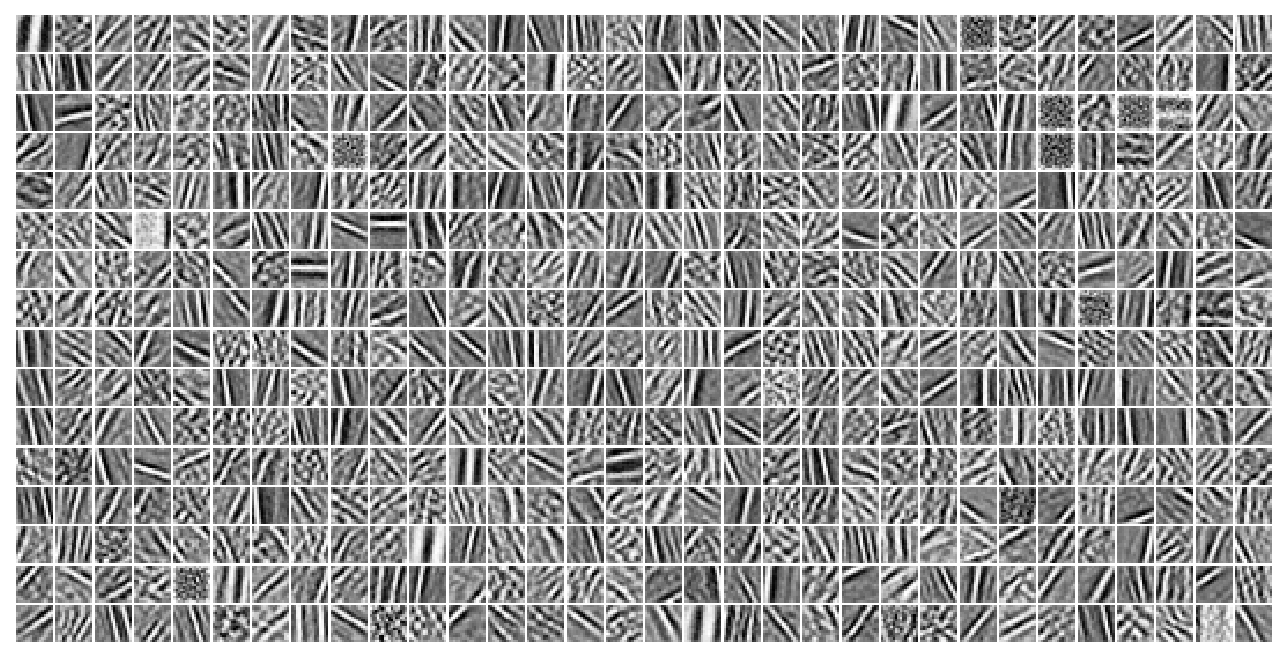

poisson-st:
{'mse': 158.31535, 'kl': 20.987072, 'kl_diag': 0.04052841, 'tot': 179.30243}

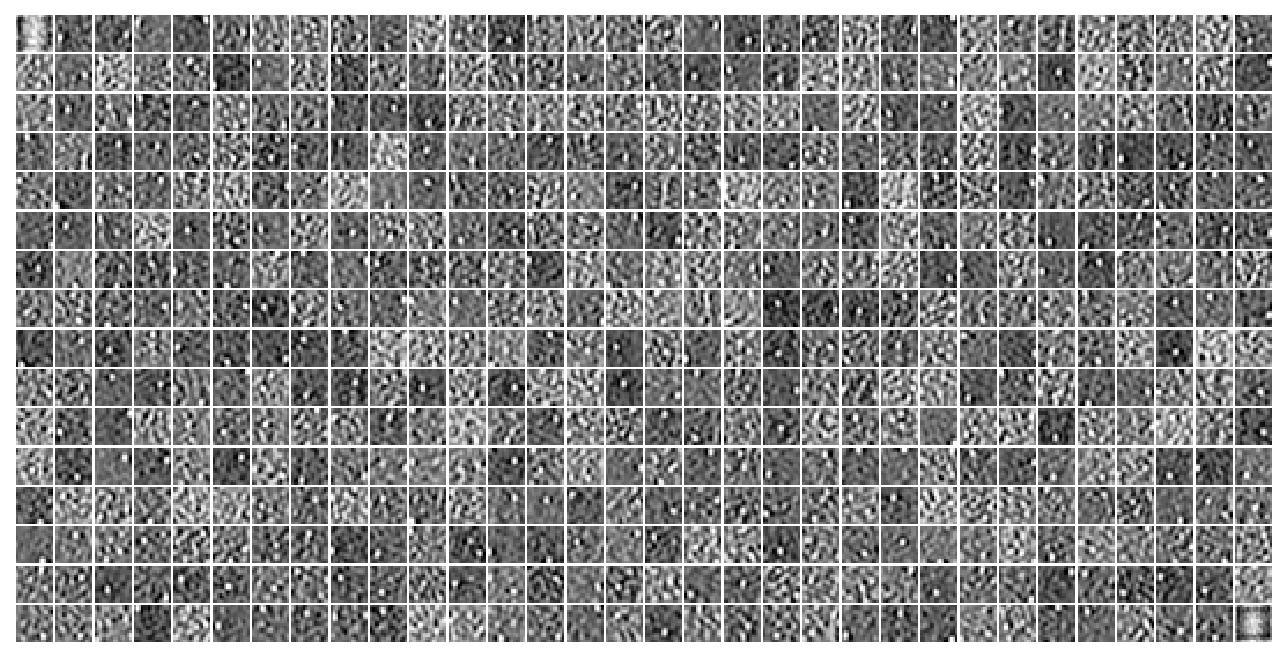

poisson-mc:
{'mse': 137.65105, 'kl': 29.510105, 'kl_diag': 0.056955107, 'tot': 167.16115}

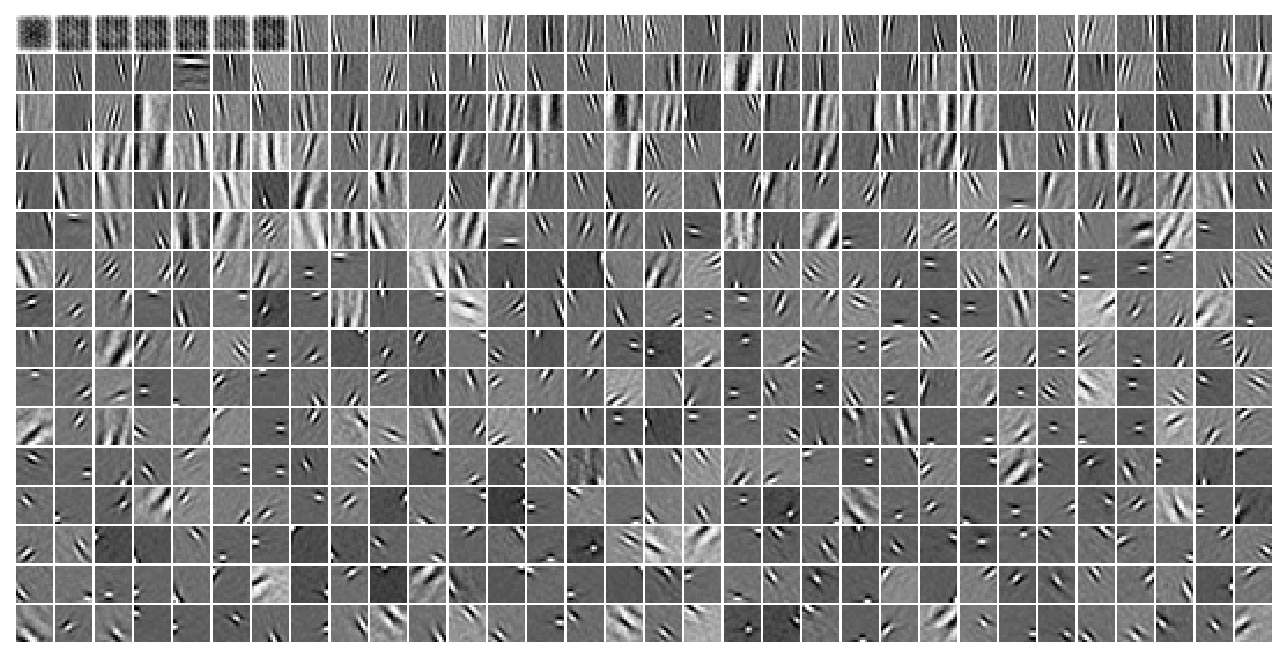

In [6]:
for name, tr in trainers.items():
    data, loss, etc = tr.validate()
    loss_avg = {k: v.mean() for k, v in loss.items()}
    loss_avg['tot'] = loss_avg['mse'] + loss_avg['kl']

    print(f"{name}:\n{loss_avg}")
    if 'categorical' in name:
        order = None
    else:
        order = np.argsort(loss['kl_diag'])
    tr.model.show(order=order);

## Chewie conv test

- also gives the warning (pytorch 2.3.0)
- but as fast as solo
- cpu related? both chewi and solo run AMD Ryzen
- mach runs intel

In [3]:
import torch
from torch import nn
x = nn.Parameter(torch.randn(123, 16, 64, 64), requires_grad=True).cuda()
conv = nn.Conv2d(16, 32, 3, 1).cuda()
y = conv(x)
loss = (y - 1).pow(2).sum()
loss.backward()

/home/hadi/anaconda3/lib/python3.11/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/conda-bld/pytorch_1712608853085/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [4]:
cfg_vae, cfg_tr = default_configs('MNIST', model_type, 'conv+b|conv+b')
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

In [ ]:
tr.train()

  0%|                                                                                                | 0/1200 [00:00<?, ?it/s]/home/hadi/Dropbox/git/_PoissonVAE/base/common.py:353: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/conda-bld/pytorch_1712608853085/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(
epoch # 52, avg loss: 65.256751:   4%|██▎                                                 | 52/1200 [07:56<2:51:55,  8.99s/it]

epoch # 956, avg loss: 40.660207:  80%|█████████████████▌    | 956/1200 [4:21:21<1:03:34, 15.63s/it]